# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/var/folders/sd/5t5hwzgn15v88zwg8lw0dqzw0000gn/T/ipykernel_42410/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [28]:
df['YEAR'].max() - df['YEAR'].min()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [29]:
df['STATE'].unique()
if (df[df['STATE'] == 'OHIO']['GRADES_ALL_G'].mean()) > (df[df['STATE'] == 'MICHIGAN']['GRADES_ALL_G'].mean()):
    print('ohio')
else:
    print('Michigan')



ohio


Find the average for your chosen test across all states in 2019

In [31]:
df[df['YEAR'] == 2019]['AVG_MATH_4_SCORE'].mean()

239.9433962264151

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [32]:
states = df.groupby('STATE')
states['GRADES_ALL_G'].max()

STATE
ALABAMA                  755552.0
ALASKA                   135373.0
ARIZONA                 1123137.0
ARKANSAS                 496085.0
CALIFORNIA              6441557.0
COLORADO                 910280.0
CONNECTICUT              577390.0
DELAWARE                 136293.0
DISTRICT_OF_COLUMBIA      87315.0
DODEA                         NaN
FLORIDA                 2832424.0
GEORGIA                 1768642.0
HAWAII                   189887.0
IDAHO                    301186.0
ILLINOIS                2119707.0
INDIANA                 1054187.0
IOWA                     511850.0
KANSAS                   497275.0
KENTUCKY                 688640.0
LOUISIANA                800560.0
MAINE                    216995.0
MARYLAND                 893684.0
MASSACHUSETTS            982989.0
MICHIGAN                1785160.0
MINNESOTA                884944.0
MISSISSIPPI              506668.0
MISSOURI                 920353.0
MONTANA                  165547.0
NATIONAL                      NaN
NEBRASKA

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [48]:
df['totalbyinstruct'] = df['TOTAL_EXPENDITURE'] / df['INSTRUCTION_EXPENDITURE']
# creates a ratio for expenditure to intstruction expenditure
df['Fedrevbyinstruct'] = df['FEDERAL_REVENUE'] / df['INSTRUCTION_EXPENDITURE']
# creates ration for rederal revenue by instruction expenditure

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Instruction Expenditure')

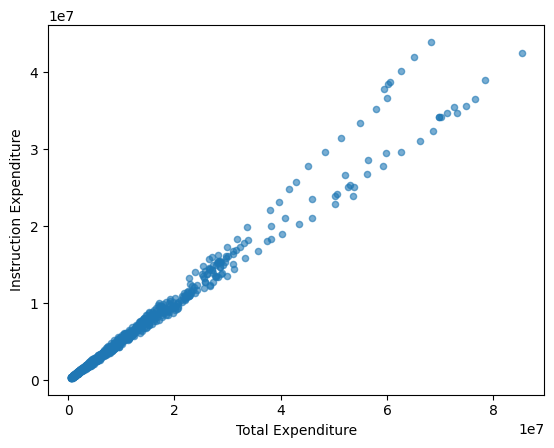

In [49]:
df.plot.scatter(x='TOTAL_EXPENDITURE', y='INSTRUCTION_EXPENDITURE', alpha=0.6)
plt.xlabel('Total Expenditure')
plt.ylabel('Instruction Expenditure')

# There seems to be a almost linear growth between total and instructional expenditure

**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0, 0.5, 'Average Grade 4 grade')

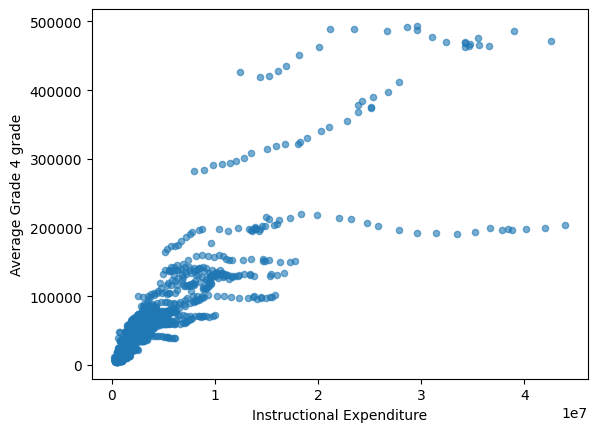

In [50]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='GRADES_4_G', alpha=0.6)
plt.xlabel('Instructional Expenditure')
plt.ylabel('Average Grade 4 grade')
# Is kind of linear but as expenditure increates the average grade begins varying more

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [51]:
from sklearn.model_selection import train_test_split

In [56]:
# X =
# y = 
X = df[['GRADES_8_G', 'totalbyinstruct', 'Fedrevbyinstruct', 'AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE', 'YEAR']].dropna()
Y = df.loc[X.index]["AVG_MATH_8_SCORE"]
Y.fillna(y.median(),inplace = True)

In [57]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [58]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [59]:
# create your model here
# model = 
model = LinearRegression()

In [60]:
model.fit(X_train, Y_train)

LinearRegression()

In [61]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [67]:
np.mean(model.predict(X_test) - Y_test)

0.4717162874285079

In [72]:
np.mean(np.abs(model.predict(X_test)-Y_test))

1.8374994349215623

In [71]:
model.score(X_test, Y_test)


0.9204174064506137

In [70]:
np.mean((model.predict(X_test) - Y_test)**2)**0.5


2.268270600426928

In [69]:
np.mean(np.abs(model.predict(X_test)-Y_test)/Y_test)


0.006575285364006368

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

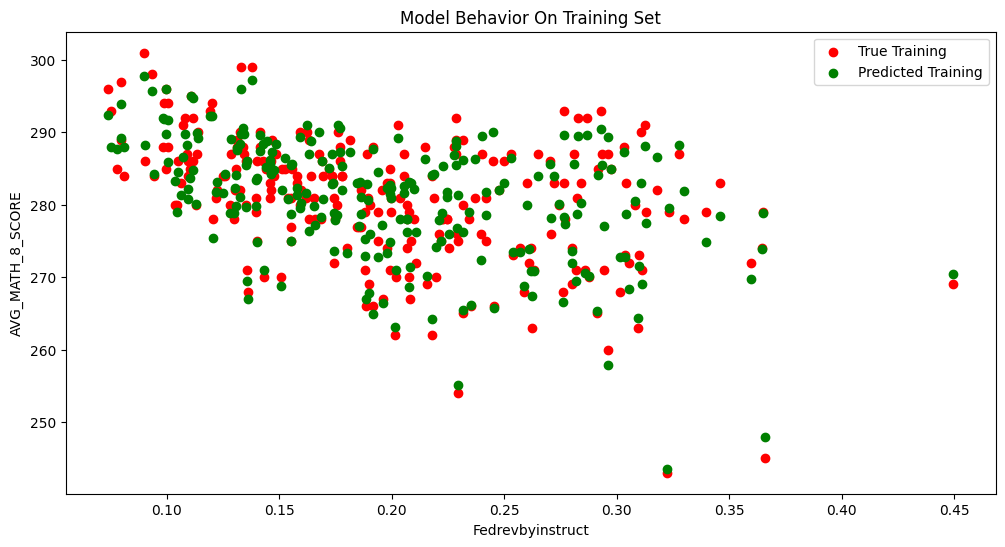

In [73]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR'

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")
col_name = 'Fedrevbyinstruct'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], Y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

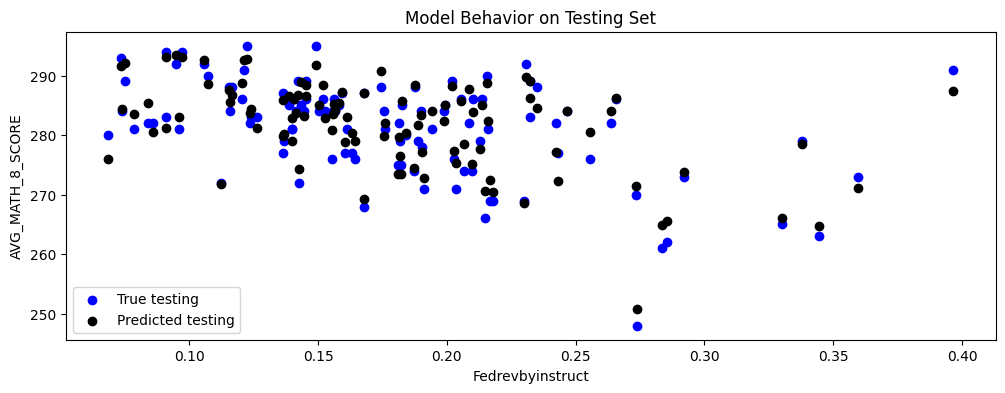

In [74]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")
col_name = 'Fedrevbyinstruct'

f = plt.figure(figsize=(12,4))
plt.scatter(X_test[col_name], Y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

I focused on predicting average Math 8 scores in the states_edu.csv dataset. I included features like federal revenue and conducted thorough data cleaning to handle missing values. Visualizations were created to better understand the data. Afterward, I trained a regression model, indicating that certain financial and demographic factors strongly impact educational outcomes. My findings suggest that targeted increases in instructional spending in these areas could greatly improve student performance.






**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**